### Import the Fashion MNIST Dataset using the library from Keras called datasets.

In [ ]:
from keras.datasets import fashion_mnist

### Loading the dataset and splitting them into training and testing.

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Checking the shape of the data we just splitted above.

In [ ]:
print('Training Data Shape: ', X_train.shape, y_train.shape)
print('Testing Data Shape: ', X_test.shape, y_test.shape)

Training Data Shape:  (60000, 28, 28) (60000,)
Testing Data Shape:  (10000, 28, 28) (10000,)


### Checking the number of unique classes in the dataset. Here we can see there are a total of 10 unique classes, each having their own identity.

In [ ]:
uniqueClasses = np.unique(y_train)
totalClasses = len(uniqueClasses)
print('Number of Unique Classes: ', totalClasses)
print('Classes: ', uniqueClasses)

Number of Unique Classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


### Plotting one image from training dataset and one image from testing dataset.

Text(0.5, 1.0, 'Class: 9')

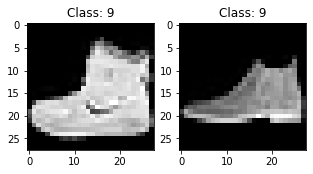

In [ ]:
plt.figure(figsize=[5, 5])

plt.subplot(121)
plt.imshow(X_train[0, :, :], cmap='gray')
plt.title("Class: {}".format(y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0, :, :], cmap='gray')
plt.title("Class: {}".format(y_test[0]))

### Reshaping the dataset into 2 dimensions because we are going to use Conv2D layer which needs a 4 dimension input shape.

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Right now the dataset is in the format of int8 so we have to convert it to float32 before feeding it into the model. After that we are going to scale the value from 0 - 1 by dividing by 255.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

### Next, we are going to one hot encode the y_train and y_test using the to_categorical function.

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Test Print
y_test_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

### Now, we are going to split the training dataset into training and validation dataset. I have divided train and validation into 80 20 respectively.

In [ ]:
X_train, X_valid, train_label, valid_label = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=13)

In [ ]:
X_train.shape, X_valid.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### This will be the part where modelling the data starts. I have used the batch size of 64 and 20 epochs. n_classes are the total number of outputs which are 10 (0 - 9).

In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
n_classes = 10

### First we add our first convolutional layer using Conv2D. We are using Conv2D here because we are dealing with images. Next we add the LeakyReLU because it's going to help the network learn non-linear decision boundary. Next would be the MaxPooling2D layer and then the last layer would be the Dense layer using the softmax function. After that would be the Dropout layer which helps us avoiding the problem of overfitting. 

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(n_classes, activation='softmax'))

### Now we are going to compile our model that we just made using Adam Optimizer as the optimizer and Categorical CrossEntropy as the loss function which is often used as a loss function for multi-class classification.

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

### Now we fit the model.

In [ ]:
fashion_train_dropout = fashion_model.fit(X_train, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, valid_label))

Epoch 1/20
750/750 [==============================] - 69s 90ms/step - loss: 0.8479 - accuracy: 0.6843 - val_loss: 0.3688 - val_accuracy: 0.8692
Epoch 2/20
750/750 [==============================] - 68s 90ms/step - loss: 0.3942 - accuracy: 0.8532 - val_loss: 0.3090 - val_accuracy: 0.8868
Epoch 3/20
750/750 [==============================] - 67s 90ms/step - loss: 0.3322 - accuracy: 0.8802 - val_loss: 0.2816 - val_accuracy: 0.8965
Epoch 4/20
750/750 [==============================] - 67s 90ms/step - loss: 0.3107 - accuracy: 0.8836 - val_loss: 0.2666 - val_accuracy: 0.8994
Epoch 5/20
750/750 [==============================] - 67s 90ms/step - loss: 0.2836 - accuracy: 0.8947 - val_loss: 0.2575 - val_accuracy: 0.9047
Epoch 6/20
750/750 [==============================] - 67s 89ms/step - loss: 0.2712 - accuracy: 0.8988 - val_loss: 0.2640 - val_accuracy: 0.9018
Epoch 7/20
750/750 [==============================] - 68s 91ms/step - loss: 0.2577 - accuracy: 0.9036 - val_loss: 0.2344 - val_accuracy:

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


### We evaluate the model to see how our model works on the testing dataset. The results that I've got is quite impressive. The total loss is 0.2238 and the accuracy of 0.9195 (almost 92%).

In [ ]:
evaluation = fashion_model.evaluate(X_test, y_test_encoded, verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.2238 - accuracy: 0.9195


In [ ]:
print('Test Loss: ', evaluation[0])
print('Test Accuracy: ', evaluation[1])

Test Loss:  0.22383537888526917
Test Accuracy:  0.9194999933242798


### Now let's plot the loss and accuracy plots for training and validation to see the results visually.

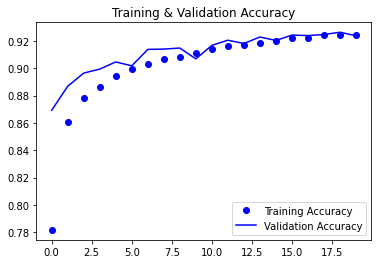

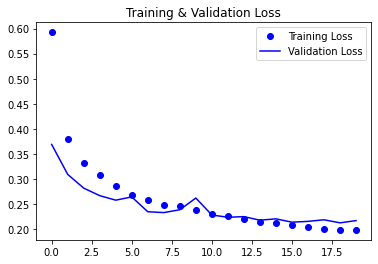

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

### Now it's the time for prediction. We have a 92% of accuracy.

In [ ]:
predicted = fashion_model.predict(X_test)
predicted = np.argmax(np.round(predicted), axis=1)

In [ ]:
from sklearn.metrics import classification_report
class_number = ["Class {}".format(i) for i in range(n_classes)]
print(classification_report(y_test, predicted, target_names=class_number))

              precision    recall  f1-score   support

     Class 0       0.77      0.93      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.83      0.68      0.75      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Here we visualize the correct predictions made by the model.

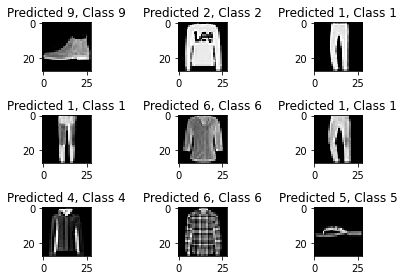

In [ ]:
correct = np.where(predicted==y_test)[0]

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_test[correct]))
    plt.tight_layout()